# Implementing a Neural Network

本次练习中会开发一个用于分类任务的只使用全连接层的神经网络，在CIFAR-10数据集上进行测试。

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from utils.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

+ 使用`utils/classifiers/neural_net.py`文件中的`TwoLayerNet`类表示网络实例
+ 网络参数存在实例变量`self.params`中，其中keys是字符串形式的变量名称，values是numpy array
+ 实例变量，参考：<https://en.wikipedia.org/wiki/Instance_variable>,创建实例时才开始生命周期的就是实例变量，对于python来说，在类的`__init__`方法中声明的变量就是实例变量
+ 下面，初始化一个toy数据和toy模型，用来完成代码实现

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.
# 设置了固定的种子保证可复现性

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    """
    数据X是标准正态分布采样的(5,4)
    数据y是随便给的。。(5,)
    """
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

**前向传播：计算scores**
+ 打开文件`utils/classifiers/neural_net.py`,查看`TwoLayerNet.loss`方法。
+ 这个函数和之前在SVM和Softmax中写的很像，使用data和weights计算类别得分，loss以及对参数的梯度
+ 实现前向传播的第一部分：使用权重和偏置计算输入的scores

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
# 你完成的代码得到的score和上面array的差异应该很小，<1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

**前向传播：计算损失**

还是在相同的函数里，完成第二部分：计算数据和正则项的损失（上面是计算scores）

In [4]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
# 计算出的损失和上面那个损失的差异要很小，<1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:


**反向传播**
+ 完成函数剩余部分，计算损失函数相对于变量`W1`, `b1`, `W2`和`b2`的梯度
+ 如果你有一个正确的前向传播，那么就可以使用数值梯度来验证反向传播了

In [5]:
from utils.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.
# 如果关于梯度的实现是正确的，那么对于W1, W2, b1和b2来说，数值梯度和解析梯度的差异不会超过1e-8
loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09
W2 max relative error: 3.440708e-09
b2 max relative error: 4.447656e-11


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

**训练网络**
+ 为了训练网络，使用随机梯度下载stochastic gradient descent (SGD)，和在SVM和Softmax分类器中使用的差不多。
+ 在函数`TwoLayerNet.train`中补充缺失的部分来实现训练流程，和在SVM和Softmax分类器中使用的也差不多。
+ 也要实现`TwoLayerNet.predict`，因为训练过程中会定期执行预测（validation）来跟踪网络训练的准确性
+ 实现了上述方法后，运行下面的代码在toy数据上训练两层的神经网络，会得到一个训练损失值小于0.2的结果

Final training loss:  0.017149607938732048


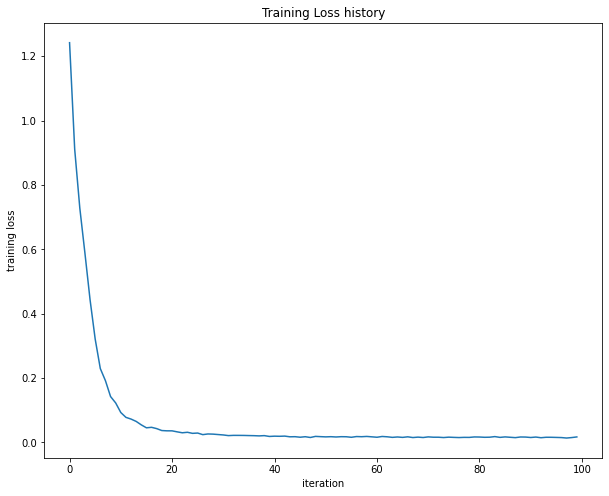

In [6]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

现在已经实现了一个通过了梯度检查并且在toy数据上有效的两层的神经网络，现在就可以加载cifar-10数据集，然后在这个真的数据集上训练一个分类器了

In [7]:
from utils.datasets_util import load_cifar10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = '../../datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_cifar10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask].astype(float)
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask].astype(float)
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask].astype(float)
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

使用带有动量momentum的SGD来训练模型，除此之外，在优化过程中会使用指数学习率计划（指数衰减）exponential learning rate schedule来调整学习率，在每个epoch之后，会通过乘以一个衰减率来减少学习率

In [48]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 1000: loss 2.302970
iteration 100 / 1000: loss 2.302474
iteration 200 / 1000: loss 2.297076
iteration 300 / 1000: loss 2.257328
iteration 400 / 1000: loss 2.230484
iteration 500 / 1000: loss 2.150620
iteration 600 / 1000: loss 2.080736
iteration 700 / 1000: loss 2.054914
iteration 800 / 1000: loss 1.979290
iteration 900 / 1000: loss 2.039101
Validation accuracy:  0.287


# Debug the training

+ 使用代码中提供的默认的参数，会得到验证集上的验证准确率大约是0.29，并不是很好
+ 一种搞清楚为什么结果表现不好的策略是：把优化期间（训练过程和验证过程）中损失函数和准确率画出来。
    + 这里只有训练集的损失，训练集和验证集的准确率，没有验证集的损失。。
+ 另一种策略就是可视化网络第一层学到的权重，在大多数用视觉数据训练的神经网络中，第一层的权重通常可视化的时候都会展示出一些可见的结构

With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

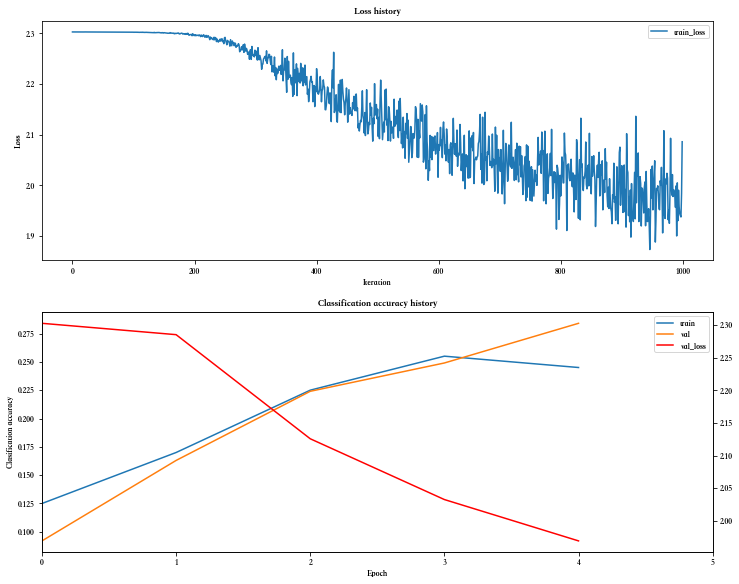

In [59]:
# Plot the loss function and train / validation accuracies
# <https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html#sphx-glr-gallery-subplots-axes-and-figures-two-scales-py>
# <https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend>
# <https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots>
fig, axs = plt.subplots(2, 1)

axs[0].plot(stats['loss_history'],label='train_loss')


axs[0].set_title('Loss history')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Loss')
axs[0].legend()

# plt.tight_layout(pad=4)
plt.tight_layout(h_pad=3,w_pad=1.08)
l1=axs[1].plot(stats['train_acc_history'], label='train')
l2=axs[1].plot(stats['val_acc_history'], label='val')
axs[1].set_title('Classification accuracy history')
axs[1].set_xlabel('Epoch')
axs[1].set_xlim(0,5)
ax2 = axs[1].twinx() 
l3=ax2.plot(stats['val_loss_history'], label='val_loss',color='red')
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/csd_demo.html#sphx-glr-gallery-lines-bars-and-markers-csd-demo-py
axs[1].set_ylabel('Clasification accuracy')
axs[1].legend(handles=l1+l2+l3)
# axs[1].legend()
plt.show()

In [51]:
stats['train_acc_history'],stats["val_loss_history"]

([0.125, 0.17, 0.225, 0.255, 0.245],
 [2.302963291185598,
  2.2855573759539833,
  2.125897122771585,
  2.0326841585387214,
  1.9692905088496437])

In [46]:
net.params['W1'].shape

(3072, 50)

After reshape: W1.shape is (50, 32, 32, 3)


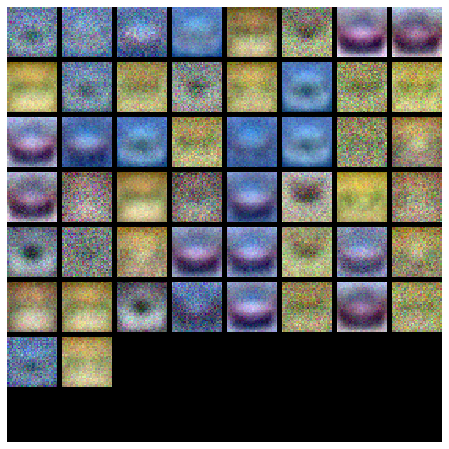

In [47]:
from utils.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2) 
    print(f"After reshape: W1.shape is {W1.shape}")# 可以理解是50个类
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**调整你的超参数**

**有什么问题？**
+ 查看上面的可视化结果，可以看到损失还是呈现线性下降的，就是数值下降的有点慢，这说明学习率可能过低了。
    + 虽然只有4个epoch，但是其实权重更新了1000次，虽然每次都是只使用200个样本的损失来更新的,
    + 训练集损失显示的是每个iteration（即每次更新权重）后的损失，**一般都是显示每个epoch的训练集损失**
    + 而训练集准确率和验证集准确率（以及后续添加的验证集损失）都是每个epoch的结果，这个是常规做法
+ 此外，训练集和验证集的准确率差不多，没有很明显的差距，说明有点欠拟合，当前使用的模型容量小，应该增加模型容量。
    + 换句话来说，需要换一个大点的模型，可以看到有些过拟合的现象，在图像上的表现就是验证集和训练集会有一个比较大的gap差距

**微调**
+ 调节超参并培养这些参数是如何影响最终性能的直觉（developing intuition）是使用神经网络很重要的一部分，需要从实践中获得经验
+ 接下来，需要进行不同超参数的实验，包括：隐藏层的size，学习率，训练的epoch数量以及正则强度。
+ 也需要考虑调节学习率衰减（learning rate decay），不过使用默认的学习率衰减应该也可以获得很好的效果

**近似结果**
+ 目标是在验证集上达到高于48%的分类准确率
+ 目前我们知道的最高的记录超过52%

**实验**
+ 本次实验的目标是尽可能在CIFAR-10上使用一个全连接网络实现一个好的结果
+ 测试集上每比52%高1%，就会给你额外的分数奖励。
+ 也可以随意用你会的算法，比如：PCA来降维，或者添加dropout，或者对优化器添加功能等。

In [110]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# 在验证集上进行超参的调节，把训练最好的模型放在best_net中
# 为了查看网络训练效果，使用类似上面的可视化方式可能会有所帮助，
# 不过你新调节过的网络可视化后的结果应该和上面那个完全没有调节过的有显然的性质上的不同的

# 手动微调参数会很有趣，但是你会发现像之前的练习一样，编码来自动扫描可能的超参数组合可能会很有效
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
best_accuracy = -10

results = {}
best_status=()
#def generate_random_hyperparams(lr, reg, hidden_size):
#    lr = 10**np.random.uniform(lr[0], lr[1])
#    reg = 10**np.random.uniform(reg[0], reg[1])
#    hidden_size = np.random.randint(hidden_size[0], hidden_size[1])
#    return lr, reg, hidden_size  
np.random.seed(1)

def random_hyperparams_search(hidden_layer_size,learning_rate,epoch,regularization):
    h_s = hidden_layer_size[np.random.randint(0,len(hidden_layer_size))]
    lr = learning_rate[np.random.randint(0,len(learning_rate))]
    epoch_size= epoch[np.random.randint(0,len(epoch))]
    reg=regularization[np.random.randint(0,len(regularization))]
    return (h_s,lr,epoch_size,reg)

hidden_layer_size_list = [150,80,100,120] # 既然上面已经知道50的隐藏层大小太小了，就增大这个参数就可以了
learning_rate_list = [0.001] # 如果是0.01结果全是loss是nan，0.08也差不多，基本都会nan
iteration_list=[1960,2350] # 245的倍数，49000/200=245
regularization_list = [0.025,0.01] # 5e-6太小了，没啥用

num_hyperparam_config=5
grid_search = [random_hyperparams_search(hidden_layer_size_list,learning_rate_list,iteration_list,regularization_list) for num in range(num_hyperparam_config) ]
grid_search.append((80,0.001,3000,0.01))
grid_search.append((80,0.001,3000,0.1))

# 第0次使用的超参组合是：隐藏层大小：150,学习率：0.002, iteration=2450, reg=0.0002 loss:1.0XX
# 隐藏层大小：80,学习率：0.001, iteration=2450, reg=0.01,训练集准确率：0.5728979591836735,验证集准确率:0.507,
# 隐藏层大小：150,学习率：0.001, iteration=2800, reg=0.01,训练集准确率：0.6098979591836735,验证集准确率:0.527,
# 隐藏层大小：80,学习率：0.001, iteration=3000, reg=0.01,训练集准确率：0.5885102040816327,验证集准确率:0.536,
for hyperparam_num,hyperparam in enumerate(grid_search):
    hidden_size,learning_rate,iteration,reg = hyperparam
    print(f"第{hyperparam_num}次使用的超参组合是：隐藏层大小：{hidden_size},学习率：{learning_rate}, iteration={iteration}, reg={reg}")
    net = TwoLayerNet(input_size, hidden_size, num_classes)
    stats = net.train(X_train, y_train, X_val, y_val,
                num_iters=iteration, batch_size=200,
                learning_rate=learning_rate, learning_rate_decay=0.95,
                reg=reg, verbose=True)
    # Predict on the validation set
    val_acc = (net.predict(X_val) == y_val).mean()
    train_acc = (net.predict(X_train) == y_train).mean()
    if val_acc>best_accuracy:
        best_accuracy=val_acc
        best_net=net
        best_status=stats
    results[hyperparam_num]=(val_acc,train_acc)

第0次使用的超参组合是：隐藏层大小：80,学习率：0.001, iteration=2350, reg=0.025
iteration 0 / 2350: loss 2.302659
iteration 100 / 2350: loss 1.931450
iteration 200 / 2350: loss 1.768769
iteration 300 / 2350: loss 1.724275
iteration 400 / 2350: loss 1.626451
iteration 500 / 2350: loss 1.502509
iteration 600 / 2350: loss 1.516955
iteration 700 / 2350: loss 1.449352
iteration 800 / 2350: loss 1.442441
iteration 900 / 2350: loss 1.521478
iteration 1000 / 2350: loss 1.348258
iteration 1100 / 2350: loss 1.380056
iteration 1200 / 2350: loss 1.315807
iteration 1300 / 2350: loss 1.452086
iteration 1400 / 2350: loss 1.209636
iteration 1500 / 2350: loss 1.348725
iteration 1600 / 2350: loss 1.413156
iteration 1700 / 2350: loss 1.401151
iteration 1800 / 2350: loss 1.417245
iteration 1900 / 2350: loss 1.315083
iteration 2000 / 2350: loss 1.224013
iteration 2100 / 2350: loss 1.376512
iteration 2200 / 2350: loss 1.132059
iteration 2300 / 2350: loss 1.289805
第1次使用的超参组合是：隐藏层大小：150,学习率：0.001, iteration=2350, reg=0.01
iteratio

In [109]:
# https://www.geeksforgeeks.org/python-sort-python-dictionaries-by-key-or-value/
for hyperparam_num, acc in sorted(results.items(),key=lambda kv:(kv[1], kv[0])):
    hidden_size,learning_rate,iteration,reg = grid_search[hyperparam_num]
    val_acc,train_acc = acc
    print(f"隐藏层大小：{hidden_size},学习率：{learning_rate}, iteration={iteration}, reg={reg},训练集准确率：{train_acc},验证集准确率:{val_acc},")

隐藏层大小：120,学习率：0.001, iteration=1960, reg=0.01,训练集准确率：0.5556938775510204,验证集准确率:0.491,
隐藏层大小：150,学习率：0.001, iteration=1960, reg=0.01,训练集准确率：0.5749591836734694,验证集准确率:0.507,
隐藏层大小：150,学习率：0.001, iteration=2350, reg=0.01,训练集准确率：0.5889183673469388,验证集准确率:0.511,
隐藏层大小：100,学习率：0.001, iteration=2350, reg=0.025,训练集准确率：0.5695714285714286,验证集准确率:0.516,
隐藏层大小：80,学习率：0.001, iteration=3000, reg=0.1,训练集准确率：0.5762857142857143,验证集准确率:0.516,
隐藏层大小：120,学习率：0.001, iteration=2350, reg=0.01,训练集准确率：0.5744897959183674,验证集准确率:0.519,
隐藏层大小：80,学习率：0.001, iteration=3000, reg=0.01,训练集准确率：0.5877959183673469,验证集准确率:0.528,


**同样的参数，每次运行结果也不完全相同，但是差距不会很大，1%~3%左右，好的参数组合依然是好的参数组合**

After reshape: W1.shape is (80, 32, 32, 3)


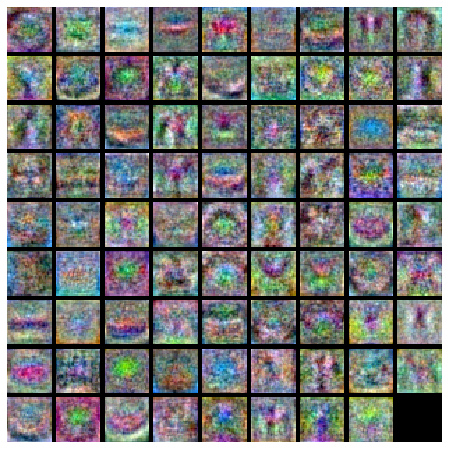

In [111]:
# visualize the weights of the best network
show_net_weights(best_net)

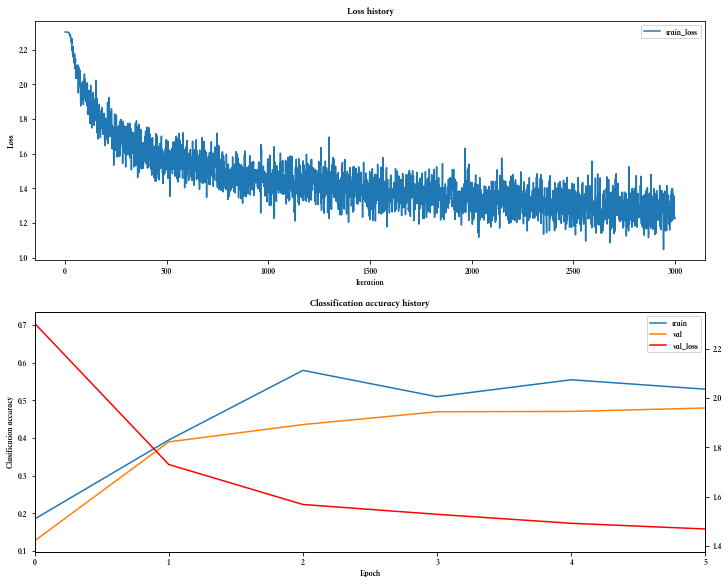

In [112]:
fig, axs = plt.subplots(2, 1)

axs[0].plot(stats['loss_history'],label='train_loss')
axs[0].set_title('Loss history')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Loss')
axs[0].legend()

# plt.tight_layout(pad=4)
plt.tight_layout(h_pad=3,w_pad=1.08)
l1=axs[1].plot(stats['train_acc_history'], label='train')
l2=axs[1].plot(stats['val_acc_history'], label='val')
axs[1].set_title('Classification accuracy history')
axs[1].set_xlabel('Epoch')
axs[1].set_xlim(0,5)
ax2 = axs[1].twinx() 
l3=ax2.plot(stats['val_loss_history'], label='val_loss',color='red')
axs[1].set_ylabel('Clasification accuracy')
axs[1].legend(handles=l1+l2+l3)
plt.show()

# Run on the test set

超参调节实验结束后，可以在测试集上评估你的训练网络，应该会得到48%以上的结果。

**每比52%高1%，就得到额外的bonus**

When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [113]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.504


# 测试代码

In [19]:
# https://mp.weixin.qq.com/s/beJvB-8LRFDFvgeLYWy77g
# 18.小数容易丢失精度
a=np.array([0.02],dtype=np.float32)
b=np.array([0.01],dtype=np.float32)
a-b

array([0.01], dtype=float32)